In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import uproot
import root_to_pandas
import plot_stuff

In [2]:
sr = 25
times = np.arange(0,32,1, dtype=float)*sr

In [3]:
READ_PATHS = ['/Users/lukepolson/Documents/test_data/pulse_347848/',
              '/Users/lukepolson/Documents/test_data/pulse_347935/',
              '/Users/lukepolson/Documents/test_data/pulse_348061/']
DF_PATH = 'test_data/Cells/'
HISTO_PATH = 'test_data/'

In [4]:
COLUMNS = ['RunNumber','LBNumber',  'EventNumber','BCID','LArError','ncells', 'ECell',
            'TCell', 'EtaCell', 'PhiCell', 'LayerCell','ProvCell', 'QuaCell','GainCell',
            'HwidCell','ADC',]

7791 and 26323 are identification numbers of the cells.

In [5]:
HW_IDs = [7791, 9670, 61040, 126604, 151685, 200164]
DFS = [pd.DataFrame(columns=COLUMNS)]*len(HW_IDs)
DFS_DICT = dict(zip(HW_IDs, DFS))

# This is the Code that Works

In [6]:
def get_lag_time_col(row):
    if row['RunNumber'] == 347848:
        if (row['LBNumber']>=157 and row['LBNumber']<=189):
            return 0
        elif (row['LBNumber']>=190 and row['LBNumber']<=252):
            return 12.5
        elif (row['LBNumber']>=253 and row['LBNumber']<=284):
            return 6.25
        elif (row['LBNumber']>=285 and row['LBNumber']<=313):
            return 18.75
        elif (row['LBNumber']>=315 and row['LBNumber']<=347):
            return 3.125
        elif (row['LBNumber']>=349 and row['LBNumber']<=398):
            return 21.875
        elif (row['LBNumber']>=399 and row['LBNumber']<=420):
            return 12.5
        else:
            return 1000
        
    if row['RunNumber'] == 347935:
        if (row['LBNumber']>=1 and row['LBNumber']<=820):
            return 0
        elif (row['LBNumber']>=822 and row['LBNumber']<=852):
            return 12.5
        elif (row['LBNumber']>=854 and row['LBNumber']<=882):
            return 21.875
        elif (row['LBNumber']>=885 and row['LBNumber']<=910):
            return 3.125
        elif (row['LBNumber']>=912 and row['LBNumber']<=1013):
            return 18.75
        else:
            return 1000
        
    if row['RunNumber'] == 348061:
        if (row['LBNumber']>=1 and row['LBNumber']<=992):
            return 9.375
        elif (row['LBNumber']>=994):
            return 15.625
        else:
            return 1000

In [7]:
first_time = False
if first_time: # Write to files
    for READ_PATH in READ_PATHS:
        for (i,filename) in enumerate(os.listdir(READ_PATH)):
            if(i%30==0): print(i) 
            if filename.endswith(".pkl"):
                opened_df = pd.read_pickle(READ_PATH+filename)
                for HW_ID in HW_IDs:
                    DFS_DICT[HW_ID] = DFS_DICT[HW_ID].append(opened_df[opened_df['HwidCell']==HW_ID])
            del(opened_df)
    
    #Save to File
    for key in DFS_DICT:
        DFS_DICT[key]['LagTime'] = DFS_DICT[key].apply(get_lag_time_col, axis=1) 
        DFS_DICT[key].to_pickle(HISTO_PATH+'df_cell_{}.pkl'.format(key))
                
else: #Open files
    for (i,filename) in enumerate(os.listdir(DF_PATH)):
        if filename.endswith(".pkl"):
            opened_df = pd.read_pickle(DF_PATH+filename)
            opened_df=opened_df[opened_df['ncells']!=0]
            hwid = int(filename[8:-4])
            DFS_DICT[hwid] = opened_df

In [8]:
DFS_DICT.keys()

dict_keys([7791, 9670, 61040, 126604, 151685, 200164])

In [9]:
df = DFS_DICT[61040]
df["ncells"] = pd.to_numeric(df["ncells"])
df["GainCell"] = pd.to_numeric(df["GainCell"])
df["QuaCell"] = pd.to_numeric(df["QuaCell"])
df.head()

,RunNumber,LBNumber,EventNumber,BCID,LArError,ncells,ECell,TCell,EtaCell,PhiCell,LayerCell,ProvCell,QuaCell,GainCell,HwidCell,ADC,LagTime
2310,347848,170,3414406,1,0,40,2491.260010,0.648180,-0.710745,-2.656975,2,8613,71,0,61040,"[9, 0, 0, -7, -3, 153, 263, 219, 137, 52, 5, -...",0.00
344,347848,250,4551986,1,1,42,5129.583496,-11.681820,-0.710745,-2.656975,2,8613,997,0,61040,"[0, 12, 9, -3, 94, 501, 516, 365, 210, 75, -19...",12.50
3149,347848,160,3079823,1,0,6,2381.452393,0.085180,-0.710745,-2.656975,2,8613,17,0,61040,"[2, 1, 3, 0, 0, 150, 254, 204, 136, 70, 21, -1...",0.00
4420,347848,288,5576005,1,0,10,6392.371094,-17.840818,-0.710745,-2.656975,2,8613,376,0,61040,"[0, -4, 5, 0, 250, 671, 590, 412, 216, 62, -38...",18.75
5092,347848,285,5489524,1,0,10,3379.524902,-18.169819,-0.710745,-2.656975,2,8613,295,0,61040,"[0, 8, -5, 4, 133, 360, 306, 216, 112, 39, -16...",18.75


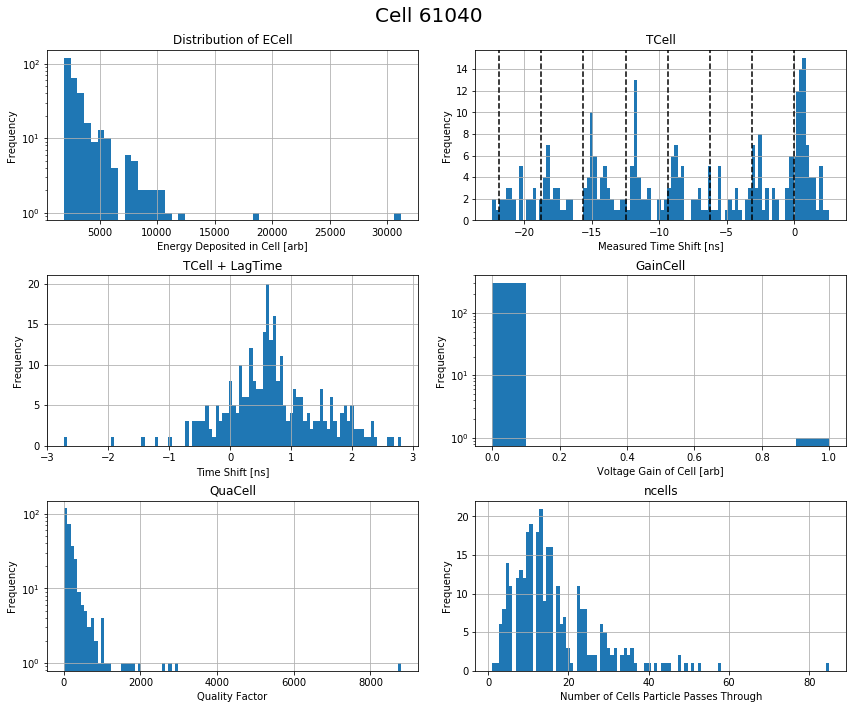

In [10]:
fig, ax = plt.subplots(3,2, figsize=(12,10))

df['ECell'].hist(bins=50, ax=ax[0,0])
ax[0,0].set_xlabel('Energy Deposited in Cell [arb]')
ax[0,0].set_title('Distribution of ECell')

df['TCell'].hist(bins=100, ax=ax[0,1])
ax[0,1].set_xlabel('Measured Time Shift [ns]')
ax[0,1].set_title('TCell')
[ax[0,1].axvline(-3.125*i, color='k', ls='--') for i in range(8)]

(df['TCell']+df['LagTime']).hist(bins=100, ax=ax[1,0])
ax[1,0].set_xlabel('Time Shift [ns]')
ax[1,0].set_title('TCell + LagTime')

df['GainCell'].hist(ax=ax[1,1])
ax[1,1].set_xlabel('Voltage Gain of Cell [arb]')
ax[1,1].set_title('GainCell')

df['QuaCell'].hist(bins=100, ax=ax[2,0])
ax[2,0].set_xlabel('Quality Factor')
ax[2,0].set_title('QuaCell')

df['ncells'].hist(bins=100, ax=ax[2,1])
ax[2,1].set_xlabel('Number of Cells Particle Passes Through')
ax[2,1].set_title('ncells')

ax[0][0].set_yscale('log', nonposy='clip')
ax[1][1].set_yscale('log', nonposy='clip')
ax[2][0].set_yscale('log', nonposy='clip')

[a.set_ylabel('Frequency') for a in ax.ravel()]
fig.suptitle('Cell {}'.format(df.iloc[0]['HwidCell']), fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()

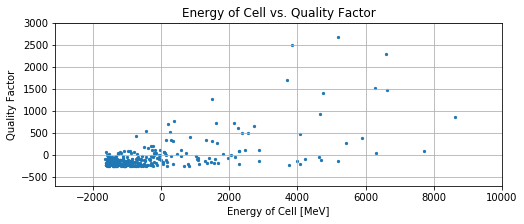

In [29]:
fig, ax = plt.subplots(1,1, figsize=(8,3))

ax.scatter(df['ECell']-df['ECell'].mean(), df['QuaCell']-df['QuaCell'].mean(),
          s=5)
ax.set_xlabel('Energy of Cell [MeV]')
ax.set_ylabel('Quality Factor')

ax.set_xlim(None, 10000)
ax.set_ylim(None, 3000)

ax.set_title('Energy of Cell vs. Quality Factor')
ax.grid()
plt.show()

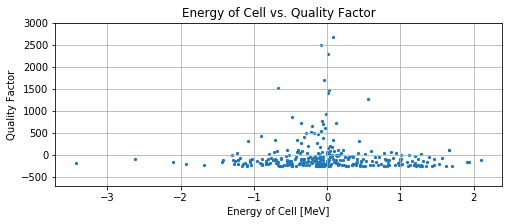

In [31]:
tt = df['TCell']+df['LagTime']
fig, ax = plt.subplots(1,1, figsize=(8,3))

ax.scatter(tt-tt.mean(), df['QuaCell']-df['QuaCell'].mean(),
          s=5)
ax.set_xlabel('Energy of Cell [MeV]')
ax.set_ylabel('Quality Factor')

ax.set_ylim(None, 3000)

ax.set_title('Energy of Cell vs. Quality Factor')
ax.grid()
plt.show()

In [11]:
ADC = df[df['ECell']>20000].iloc[0]['ADC']
EE = df[df['ECell']>20000].iloc[0]['ECell']
tt = times + df[df['ECell']>20000].iloc[0]['LagTime']

Interestingly, the outlier cell with really high energy actually had a fairly small quality factor. It was, however, the only instance where GainCell=1. See below:

In [12]:
df[df['ECell']>20000]

,RunNumber,LBNumber,EventNumber,BCID,LArError,ncells,ECell,TCell,EtaCell,PhiCell,LayerCell,ProvCell,QuaCell,GainCell,HwidCell,ADC,LagTime
1896,348061,960,12344824,1,0,44,31204.966797,-8.605821,-0.710745,-2.656975,2,8613,441,1,61040,"[1, 0, 0, 1, 48, 312, 333, 243, 146, 58, 2, -3...",9.375


# How Does this Compare to Time Averaged Pulse?

We now look at how the outlier pulse compares to the time averaged pulse

In [13]:
file = uproot.open(HISTO_PATH+'LArPulseTest.root')
hwids = [int(key[5:-2].decode('utf-8')) for key in file.keys()]

histos = [file[key] for key in file.keys()]
histo_dfs = [root_to_pandas.hist_to_df(histo) for histo in histos]
histo_dfs = dict(zip(hwids, histo_dfs))

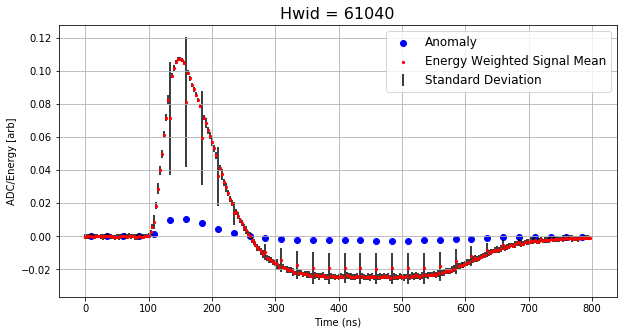

In [27]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(tt, ADC/EE, color='b', label='Anomaly')
plot_stuff.plotter_macro(ax, histo_dfs, hwids[2])

plt.savefig('test.png', dpi=200)
plt.show()

Interestingly, if I multiply it by 10, it appears to match up perfectly. This suggests that something may be wrong with the gain factor:

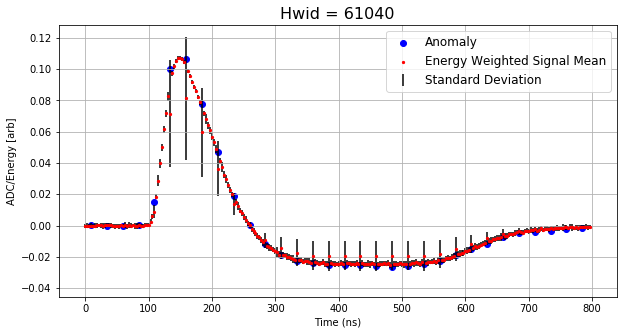

In [28]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(tt, ADC/EE*10, color='b', label='Anomaly')
plot_stuff.plotter_macro(ax, histo_dfs, hwids[2])

plt.savefig('test.png', dpi=200)
plt.show()